In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from astropy.io import fits
from pathlib import Path
from astropy.table import Table
from nikkos_tools import stat_functions as sf
from nikkos_tools.spectrum_tools import line_data, display_lines
RUBIES_DATA = Path('../data').resolve()
FIGURES = Path('./figures').resolve()
RUBY_HEXCODE = '#E0115F'
GRATING_COLORS = [RUBY_HEXCODE, 'k']

In [153]:
rubies = list(RUBIES_DATA.glob('rubies_extraction*.fits'))
df = (Table.read(rubies[0], format='fits')
      .to_pandas()
      [['srcid', 'ra', 'dec', 'grating', 'effexptm', 'z', 
        'line_hb', 'line_hb_err', 
        'line_neiii_3867', 'line_neiii_3867_err', 
        'line_oii', 'line_oii_err', 
        'line_oiii_5007', 'line_oiii_5007_err', 
        'line_oiii_4959', 'line_oiii_4959_err',
        'line_oiii', 'line_oiii_err']]
      .assign(
          OIII_Hb = lambda x: x.line_oiii_5007/x.line_hb,
          O32 = lambda x: x.line_oiii_5007/x.line_oii,
          NeIII_OII = lambda x: x.line_neiii_3867/x.line_oii,
          R23 = lambda x: (x.line_oiii_5007+x.line_oiii_4959)/x.line_hb,
          OIII_Hb_ERR = lambda x: sf.propagate_ratio_uncertainty(x.line_oiii_5007, x.line_oiii_5007_err, x.line_hb, x.line_hb_err),
          O32_ERR = lambda x: sf.propagate_ratio_uncertainty(x.line_oiii_5007, x.line_oiii_5007_err, x.line_oii, x.line_oii_err),
          NeIII_OII_ERR = lambda x: sf.propagate_ratio_uncertainty(x.line_neiii_3867, x.line_neiii_3867_err, x.line_oii, x.line_oii_err)
      )
      .astype({'grating':str})
)

In [154]:
df

,srcid,ra,dec,grating,effexptm,z,line_hb,line_hb_err,line_neiii_3867,line_neiii_3867_err,...,line_oiii_4959_err,line_oiii,line_oiii_err,OIII_Hb,O32,NeIII_OII,R23,OIII_Hb_ERR,O32_ERR,NeIII_OII_ERR
0,31608,214.906169,52.842298,G395M,948.278,4.963333,-4.787077,42.070347,NaN,NaN,...,32.947260,NaN,NaN,1.442832,NaN,NaN,1.856147,14.032701,NaN,NaN
1,31739,214.902680,52.840603,G395M,948.278,5.240304,-2.865979,26.301811,NaN,NaN,...,22.392061,NaN,NaN,-27.583468,NaN,NaN,-35.876144,253.330327,NaN,NaN
2,31760,214.901618,52.839849,G395M,948.278,6.242852,132.261690,17.152670,NaN,NaN,...,21.873500,NaN,NaN,7.319330,NaN,NaN,9.733674,0.994666,NaN,NaN
3,31909,214.906554,52.843798,G395M,948.278,3.440181,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33297,214.899591,52.841566,G395M,948.278,1.358002,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,958241,34.255748,-5.226827,PRISM,948.278,7.272233,263.957340,15.967707,118.391960,17.836317,...,19.160145,NaN,NaN,5.381547,16.669992,1.389366,7.235171,0.346595,3.630073,0.366614
5949,959606,34.265806,-5.224323,PRISM,948.278,7.095468,32.718970,10.556691,16.228807,13.682286,...,10.418048,NaN,NaN,5.800062,3.029023,0.259034,8.274359,1.913361,0.641153,0.224461
5950,960332,34.314311,-5.223255,PRISM,948.278,7.980042,30.477423,43.228970,-37.175720,45.093643,...,40.652560,NaN,NaN,-1.751293,1.379326,0.960703,-4.069540,2.835709,1.878410,1.583245
5951,971810,34.313762,-5.203098,PRISM,948.278,7.451163,72.352750,20.193523,61.154090,23.968855,...,24.734000,NaN,NaN,5.661277,8.563413,1.278507,7.041465,1.623672,5.211096,0.921561


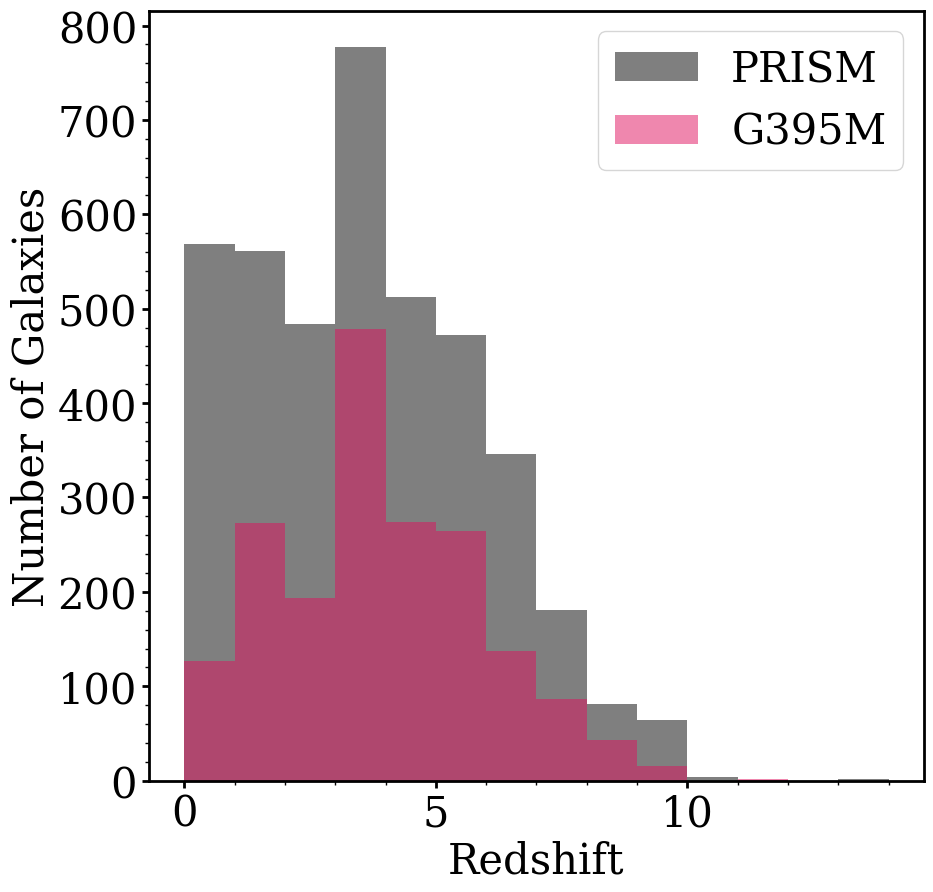

In [165]:
bins = np.arange(0,15,1)
plt.figure(figsize=(10,10))
plt.hist(df.z[df.grating =='PRISM'], color='k', alpha=0.5, bins=bins, label='PRISM')
plt.hist(df.z[df.grating =='G395M'], color=RUBY_HEXCODE, alpha=0.5, bins=bins, label='G395M')
plt.xlabel('Redshift')
plt.ylabel('Number of Galaxies')
plt.legend()
plt.savefig(FIGURES.joinpath('zhist.pdf'))
plt.show()


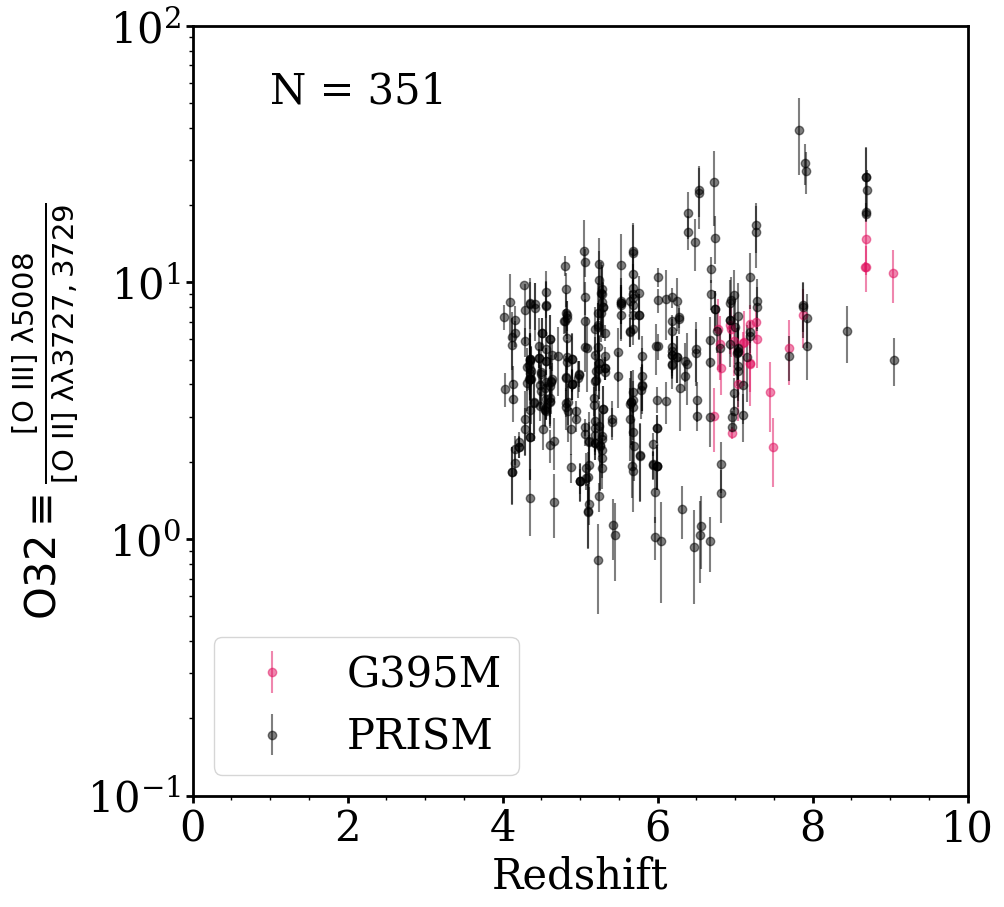

In [166]:
O32df = df[(df.line_oiii_5007/df.line_oiii_5007_err > 3)&(df.line_oii/df.line_oii_err > 3)]
plt.figure(figsize=(10,10))
for grating, grating_color in zip(df.grating.unique(), GRATING_COLORS):
    plt.errorbar(x=O32df.z[O32df.grating == grating], y=O32df.O32[O32df.grating == grating], 
                yerr=O32df.O32_ERR[O32df.grating == grating], marker='o', ls='None', zorder=-1, c=grating_color, alpha=0.5, label=grating)
plt.annotate(f'N = {len(O32df)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel('Redshift')
plt.ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3729}$')
plt.yscale('log')
plt.axis([0, 10, 0.1, 100])
plt.legend()
plt.savefig(FIGURES.joinpath('O32_z.pdf'))
plt.show()

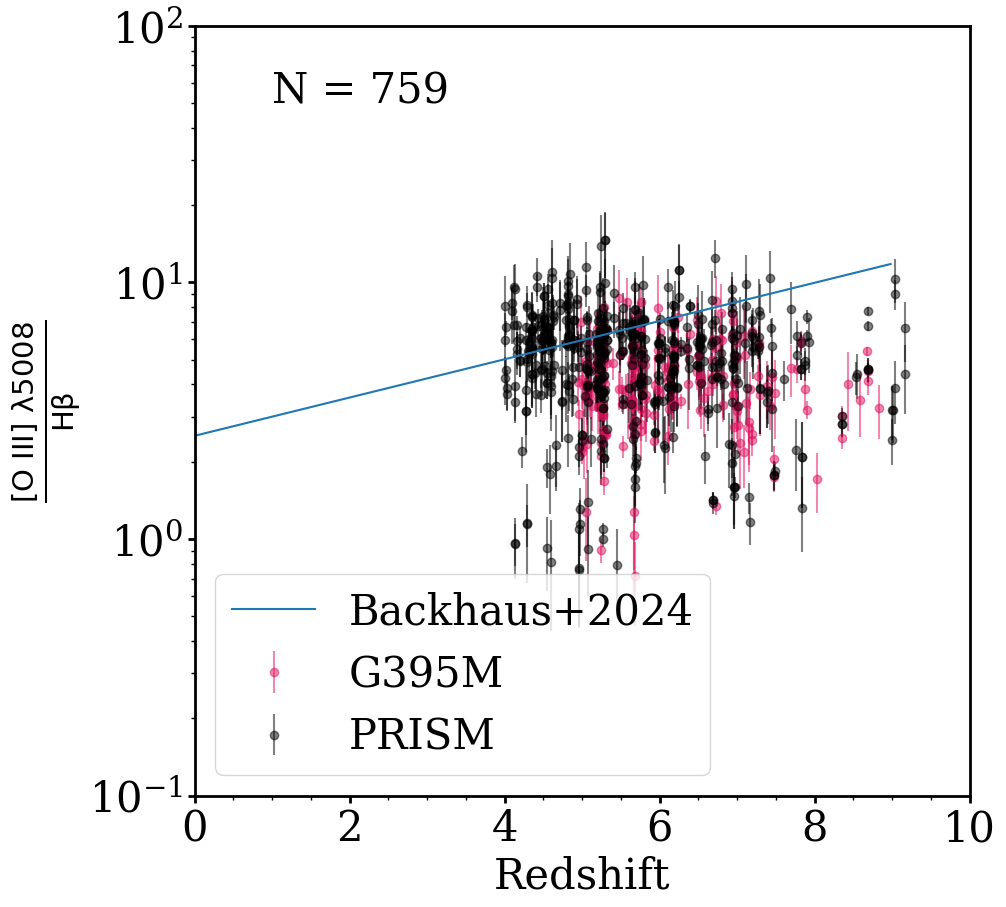

In [167]:
OIIIHbdf = df[(df.line_oiii_5007/df.line_oiii_5007_err > 3)&(df.line_hb/df.line_hb_err > 3)]
plt.figure(figsize=(10,10))
for grating, grating_color in zip(df.grating.unique(), GRATING_COLORS):
    plt.errorbar(x=OIIIHbdf.z[OIIIHbdf.grating == grating], y=OIIIHbdf.OIII_Hb[OIIIHbdf.grating == grating], 
                yerr=OIIIHbdf.OIII_Hb_ERR[OIIIHbdf.grating == grating], marker='o', ls='None', zorder=-1, c=grating_color, alpha=0.5, label=grating)
plt.plot([-0.014, 8.98],[10**0.40096618357487923, 10**1.0712560386473433], label='Backhaus+2024')

plt.annotate(f'N = {len(OIIIHbdf)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel('Redshift')
plt.ylabel(r'$\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
plt.yscale('log')
plt.legend()
plt.axis([0, 10, 0.1, 100])
plt.savefig(FIGURES.joinpath('OIIIHb_z.pdf'))
plt.show()

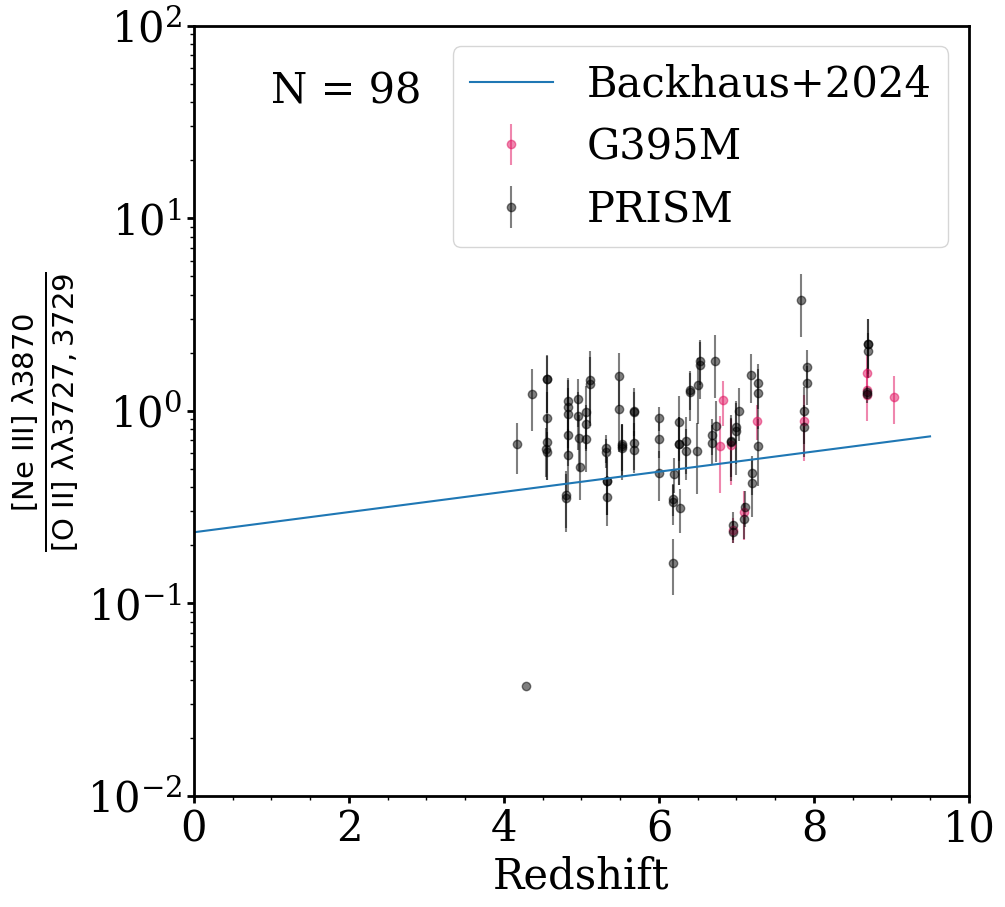

In [168]:
NeIIIOIIdf = df[(df.line_neiii_3867/df.line_neiii_3867_err > 3)&(df.line_oii/df.line_oii_err > 3)]
plt.figure(figsize=(10,10))
for grating, grating_color in zip(df.grating.unique(), GRATING_COLORS):
    plt.errorbar(x=NeIIIOIIdf.z[NeIIIOIIdf.grating == grating], y=NeIIIOIIdf.NeIII_OII[NeIIIOIIdf.grating == grating], 
                yerr=NeIIIOIIdf.NeIII_OII_ERR[NeIIIOIIdf.grating == grating], marker='o', ls='None', zorder=-1, c=grating_color, alpha=0.5, label=grating)
plt.plot([-0.00316117934323934,9.497454090956923], [10**-0.6319169589111111, 10**-0.1337090813037285], label='Backhaus+2024')
plt.annotate(f'N = {len(NeIIIOIIdf)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel('Redshift')
plt.ylabel(r'$\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3729}$')
plt.yscale('log')
plt.axis([0, 10, 0.01, 100])
plt.legend()
plt.savefig(FIGURES.joinpath('NeIIIOII_z.pdf'))
plt.show()

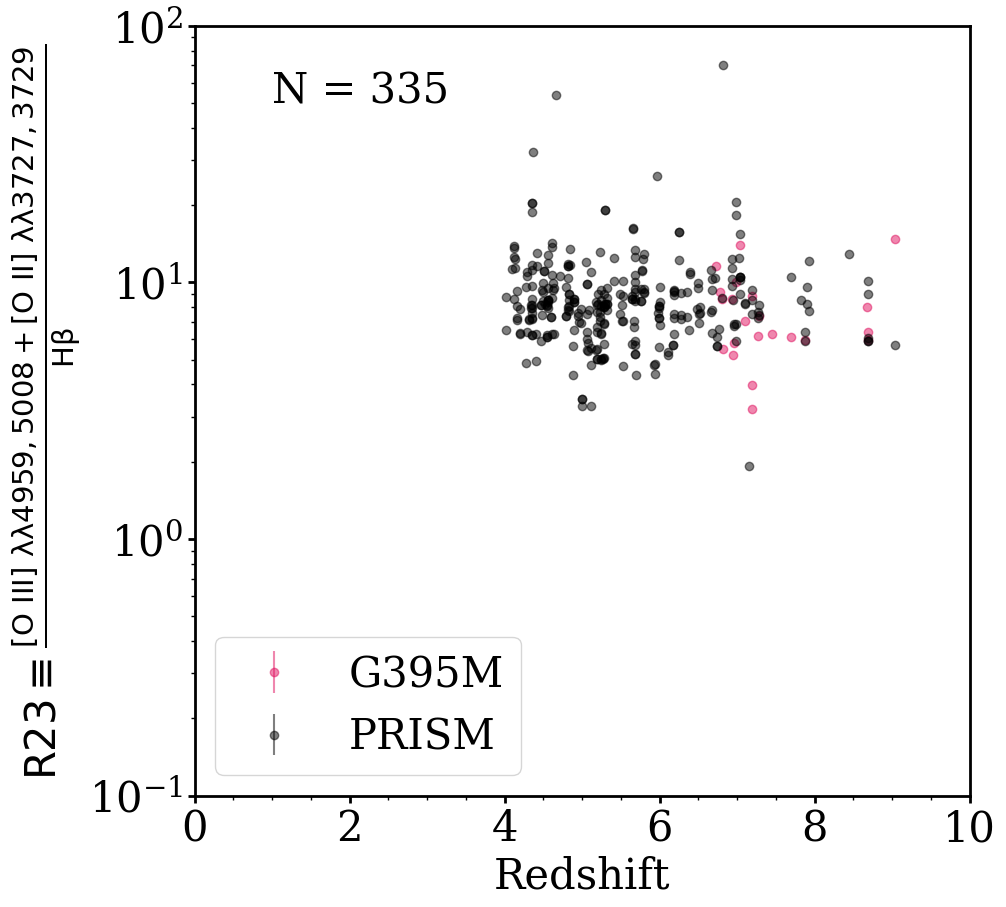

In [169]:
R23df = df[(df.line_oiii_5007/df.line_oiii_5007_err > 3)&(df.line_oiii_4959/df.line_oiii_4959_err > 3)&(df.line_oii/df.line_oii_err > 3)]
plt.figure(figsize=(10,10))
for grating, grating_color in zip(df.grating.unique(), GRATING_COLORS):
    plt.errorbar(x=R23df.z[R23df.grating == grating], y=R23df.R23[R23df.grating == grating], 
                yerr=0, marker='o', ls='None', zorder=-1, c=grating_color, alpha=0.5, label=grating)
plt.annotate(f'N = {len(R23df)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel('Redshift')
plt.ylabel(r'$\rm{R23} \equiv \frac{\rm{[O~III]}~\lambda\lambda 4959,5008 + \rm{[O~II]}~\lambda\lambda3727,3729}{H\beta}$')
plt.yscale('log')
plt.axis([0, 10, 0.1, 100])
plt.legend()
plt.savefig(FIGURES.joinpath('R23_z.pdf'))
plt.show()

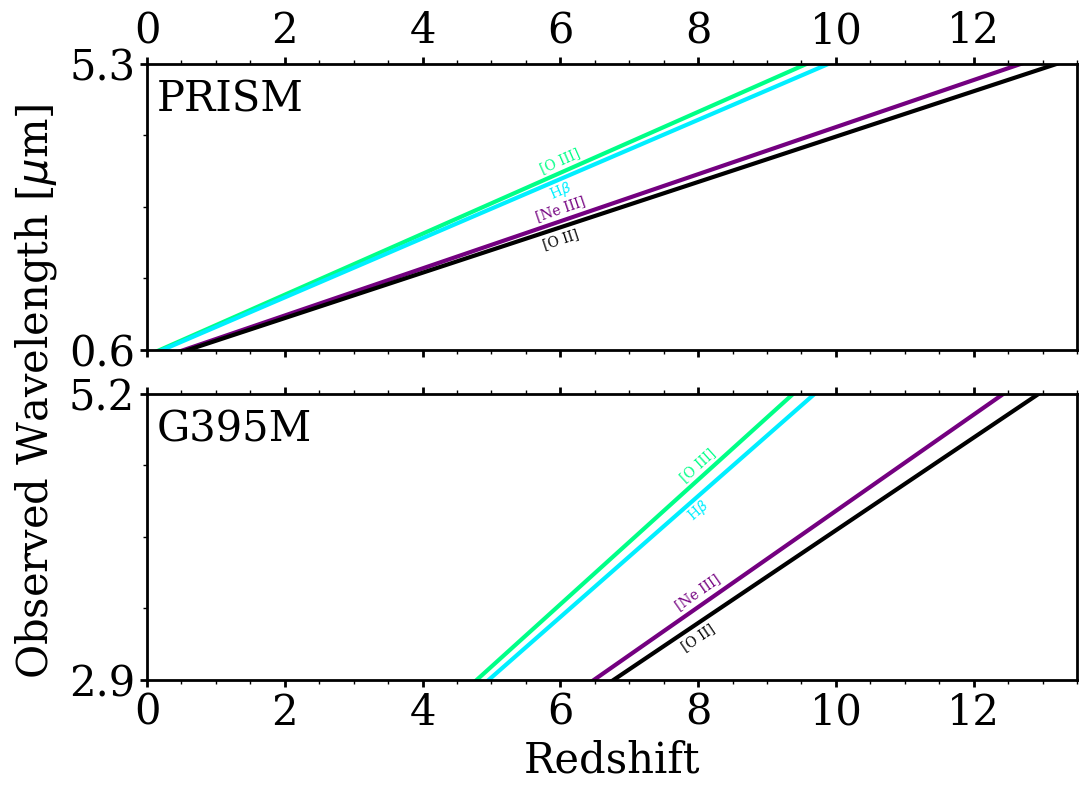

In [178]:
oiii = 5008
neiii = 3870
hb = 4862
oii = 3728

lines = [oiii, hb, neiii, oii]
labels = ['[O III]', r'H$\beta$', '[Ne III]', '[O II]']
line_colors = ['#00FF87', '#00EFFF', '#740080', '#000000']
offsets_prism = [.2, -.2, .2, -.2]
offsets_g395m = [.12, -.12, .12, -.12]
z = np.linspace(0, 15, 1000)

def get_zmin_prism(wave):
    return 6000/wave - 1
def get_zmax_prism(wave):
    return 53000/wave - 1

def get_zmin_g395m(wave):
    return 29000/wave - 1
def get_zmax_g395m(wave):
    return 52000/wave - 1
def get_line_rotation(x1,x2,y1,y2):
    return np.rad2deg(np.arctan((y2 - y1)/(x2 - x1)))

fig = plt.figure(figsize=(12,8))
gs = GridSpec(nrows=10, ncols=10)
gs.update(wspace=0, hspace=2)

ax0 = fig.add_subplot(gs[0:5, 0:10])
for line, label, line_color, offset in zip(lines,labels,line_colors,offsets_prism):
    observed_wavelengths = line*(1+z)/10**4
    ax0.plot(z, observed_wavelengths, lw=3, color=line_color, label=label)
    rotn = get_line_rotation(z[0], z[-1], observed_wavelengths[0], observed_wavelengths[-1])
    ax0.annotate(label, xy=(6,line*(1+6)/10**4+offset), fontsize=10, va='center', ha='center', color=line_color,
                 rotation=rotn, transform_rotates_text=True, rotation_mode='anchor')
ax0.annotate('PRISM',  xy=(0.01,0.95), va='top', ha='left', xycoords='axes fraction')
# ax0.legend()
ax0.axis([0,13.5,0.6,5.3])
ax0.set_yticks([0.6,5.3])
ax0.tick_params(labelbottom=False, which='both', top=True, labeltop=True)
# ax0.grid(alpha=0.5, zorder=-5)

ax1 = fig.add_subplot(gs[5:10, 0:10])
for line, label, line_color, offset in zip(lines,labels,line_colors,offsets_g395m):
    observed_wavelengths = line*(1+z)/10**4
    ax1.plot(z, observed_wavelengths, lw=3, color=line_color, label=label)
    rotn = get_line_rotation(z[0], z[-1], observed_wavelengths[0], observed_wavelengths[-1])
    ax1.annotate(label, xy=(8,line*(1+8)/10**4+offset), fontsize=10, va='center', ha='center', color=line_color,
                 rotation=rotn, transform_rotates_text=True, rotation_mode='anchor')
ax1.axis([0,13.5,2.9,5.2])
ax1.annotate('G395M',  xy=(0.01,0.95), va='top', ha='left', xycoords='axes fraction')
ax1.set_yticks([2.9,5.2])
ax1.tick_params(which='both', top=True)
plt.xlabel('Redshift')
plt.annotate(r'Observed Wavelength [$\mu$m]', va='center', ha='center', xy=(0.03,0.5), xycoords='figure fraction', rotation=90)
plt.savefig(FIGURES.joinpath('coverage.pdf'))
plt.show()

In [226]:
egs_photometry = list(RUBIES_DATA.glob('egs*sps*.fits'))
egs_photometrydf = (Table.read(egs_photometry[0], format='fits')
      .to_pandas()
)
uds_photometry = list(RUBIES_DATA.glob('uds*sps*.fits'))
uds_photometrydf = (Table.read(uds_photometry[0], format='fits')
      .to_pandas()
)

In [219]:
egs_photometry

[PosixPath('/Users/njc5787/Research/RUBIES/data/egs_prism_grade3_phot_v2_spsv0.0.fits')]

In [220]:
uds_photometry

[PosixPath('/Users/njc5787/Research/RUBIES/data/uds_prism_grade3_phot_v2_spsv0.0_idfix.fits')]

(array([  3.,   1.,   1.,  48., 162., 144., 132.,  95.,  28.,  22.]),
 array([ 5.74007035,  6.29297946,  6.84588856,  7.39879767,  7.95170678,
         8.50461589,  9.057525  ,  9.61043411, 10.16334321, 10.71625232,
        11.26916143]),
 <BarContainer object of 10 artists>)

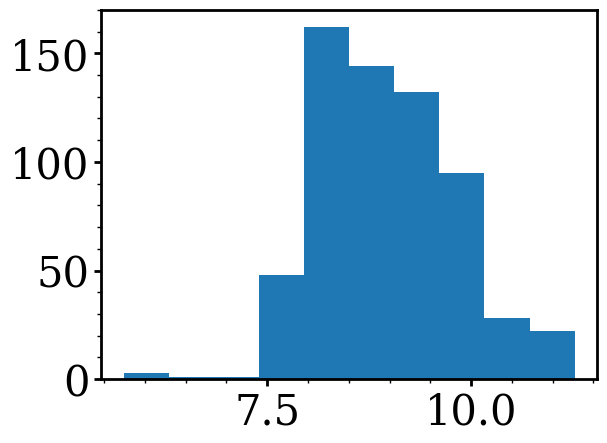

In [101]:
plt.figure()
plt.hist(egs_photometrydf.mstar_50)

In [227]:
uds_photometrydf

,id_v70,id,ra,dec,z_spec,z_16,z_50,z_84,mtot_16,mtot_50,...,UV_84,VJ_16,VJ_50,VJ_84,gi_16,gi_50,gi_84,ug_16,ug_50,ug_84
0,9407,12048,34.268650,-5.300197,4.8205,4.808211,4.821995,4.834359,8.287223,8.536438,...,0.506979,-0.845433,-0.574349,-0.270404,-0.306682,-0.205363,-0.105610,0.105572,0.224472,0.338802
1,10230,13028,34.268192,-5.298482,2.9983,2.985262,3.000213,3.012527,8.649932,8.954122,...,0.944081,-0.085388,0.124215,0.362703,0.019255,0.174665,0.479821,0.473379,0.693497,1.102268
2,11298,14286,34.267565,-5.296456,1.9775,1.963482,1.977841,1.990637,9.428540,9.607367,...,0.690183,0.180642,0.237173,0.292587,0.155263,0.191908,0.229979,0.682563,0.760766,0.844427
3,11917,15006,34.268266,-5.295208,2.5919,2.580207,2.594355,2.606899,8.632625,9.049919,...,1.718314,1.240065,1.398034,1.559152,0.847416,1.040939,1.344096,1.042260,1.368338,1.931369
4,12878,16065,34.267668,-5.293497,3.3072,3.293568,3.307413,3.320832,7.942530,8.269013,...,0.782114,-0.357009,-0.072850,0.178325,-0.058305,0.074102,0.229216,0.427790,0.611762,0.832628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,959606,866147,34.265806,-5.224323,7.0953,7.080029,7.091487,7.106422,8.738698,8.989532,...,0.366974,-0.343864,-0.126186,0.167966,-0.265282,-0.147816,0.041031,0.210523,0.323376,0.419003
284,960332,866842,34.314311,-5.223256,7.1285,7.115608,7.129493,7.141558,8.499672,8.688406,...,0.414705,-1.028601,-0.770130,-0.427312,-0.440771,-0.332141,-0.232161,-0.001423,0.062909,0.140729
285,59990,875132,34.309997,-5.209196,7.4518,7.437603,7.449970,7.464479,8.704046,8.913927,...,0.313167,-0.865834,-0.537502,-0.209904,-0.466141,-0.348632,-0.175281,-0.025161,0.093839,0.186381
286,971810,878386,34.313762,-5.203098,7.4501,7.437166,7.449792,7.463317,8.872879,9.102752,...,0.365387,-0.749323,-0.428207,-0.134168,-0.395347,-0.286768,-0.101794,0.047077,0.141156,0.236698


In [228]:
egs_photometrydf - uds_photometrydf

,UV_16,UV_50,UV_84,VJ_16,VJ_50,VJ_84,dec,dust1_fraction_16,dust1_fraction_50,dust1_fraction_84,...,ssfr30_16,ssfr30_50,ssfr30_84,ug_16,ug_50,ug_84,z_16,z_50,z_84,z_spec
0,0.077710,0.053541,0.064503,0.523378,0.376497,0.208575,58.173742,0.070974,0.080336,0.044536,...,-2.926911,-3.749221,-4.837436,0.262525,0.263637,0.304325,-3.741253,-3.740844,-3.740857,-3.7413
1,0.971806,0.818108,0.572326,1.724535,1.593360,1.425700,58.180441,0.091114,0.050695,0.115670,...,100.353456,143.280416,179.798192,0.928582,0.793244,0.462512,-0.518995,-0.520751,-0.519610,-0.5188
2,-0.214668,-0.140024,-0.075518,-0.023215,0.096580,0.231600,58.176431,0.022356,0.005216,0.013080,...,6.600780,9.001483,11.057814,-0.237532,-0.241927,-0.241986,1.496573,1.496010,1.497975,1.4974
3,-0.985806,-1.130531,-1.382928,-1.568792,-1.502214,-1.541251,58.179475,0.018844,-0.001080,-0.044994,...,4.915590,5.477121,6.962653,-0.757145,-1.038703,-1.566220,1.026238,1.024022,1.027936,1.0294
4,-0.135227,-0.181337,-0.274884,0.111888,0.044962,-0.015706,58.176017,0.025032,0.013993,0.018854,...,0.137541,-0.081133,-0.345563,-0.149157,-0.241741,-0.348723,1.313424,1.313307,1.312779,1.3119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
rubies_mergeddf = pd.merge(df, egs_photometrydf, how='inner', left_on='ra', right_on='ra')

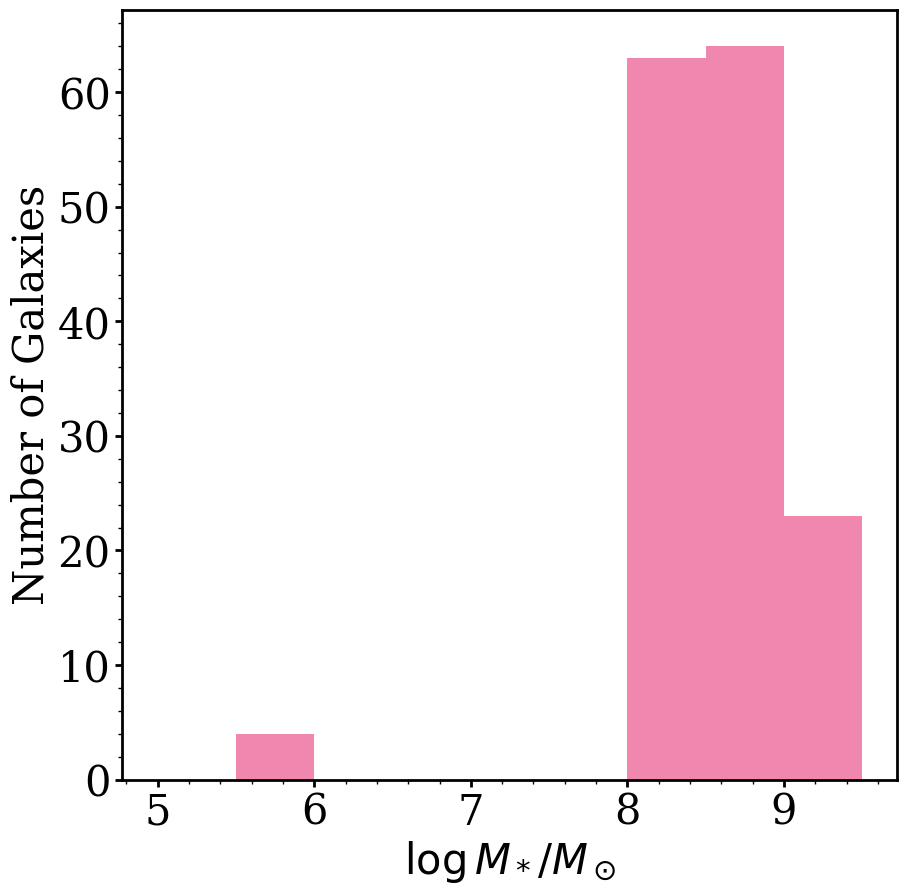

In [170]:
bins = np.arange(5,10,0.5)
plt.figure(figsize=(10,10))
plt.hist(rubies_mergeddf.mstar_50, color=RUBY_HEXCODE, alpha=0.5, bins=bins)
plt.xlabel(r'$\log M_*/M_\odot$')
plt.ylabel('Number of Galaxies')
plt.savefig(FIGURES.joinpath('mstarhist.pdf'))
plt.show()

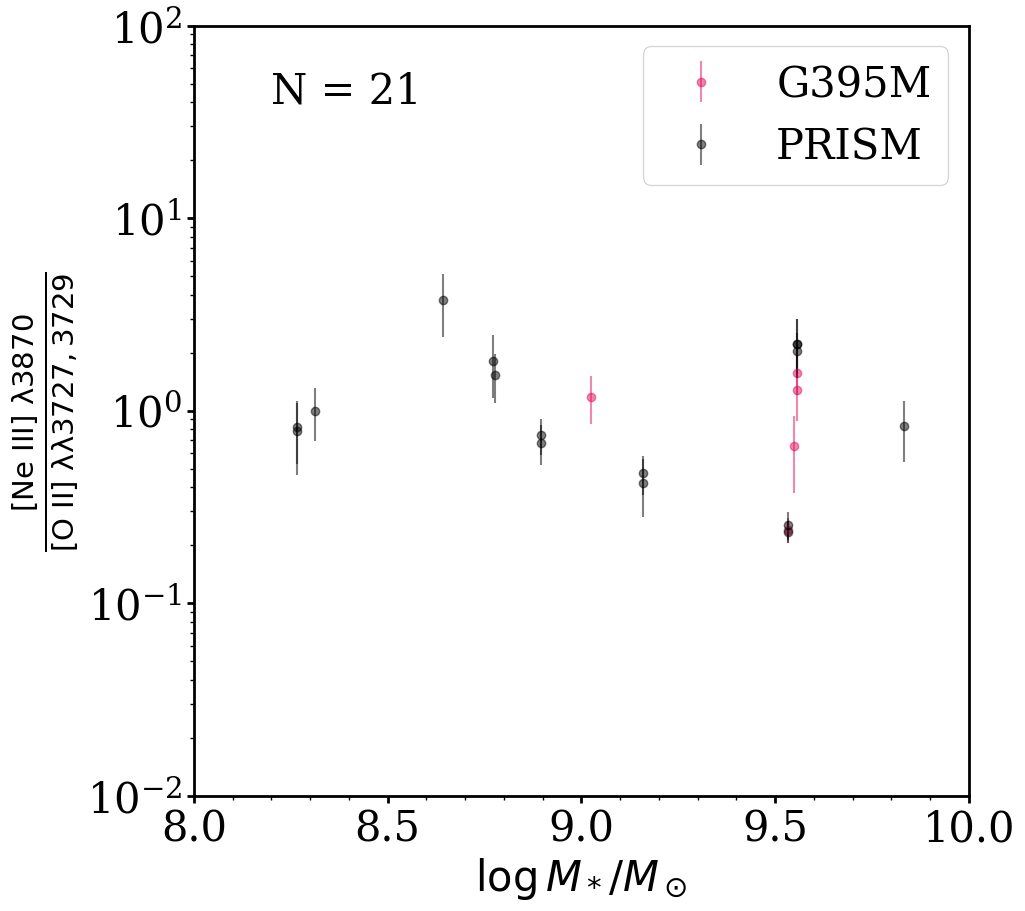

In [171]:
NeIIIOIIdf = rubies_mergeddf[(rubies_mergeddf.line_neiii_3867/rubies_mergeddf.line_neiii_3867_err > 3)&(rubies_mergeddf.line_oii/rubies_mergeddf.line_oii_err > 3)]
plt.figure(figsize=(10,10))
for grating, grating_color in zip(rubies_mergeddf.grating.unique(), GRATING_COLORS):
    plt.errorbar(x=NeIIIOIIdf.mstar_50[NeIIIOIIdf.grating == grating], y=NeIIIOIIdf.NeIII_OII[NeIIIOIIdf.grating == grating], 
                yerr=NeIIIOIIdf.NeIII_OII_ERR[NeIIIOIIdf.grating == grating], marker='o', ls='None', zorder=-1, c=grating_color, alpha=0.5, label=grating)
plt.annotate(f'N = {len(NeIIIOIIdf)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel(r'$\log M_*/M_\odot$')
plt.ylabel(r'$\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3729}$')
plt.yscale('log')
plt.axis([8, 10, 0.01, 100])
plt.legend()
plt.savefig(FIGURES.joinpath('NeIIIOII_mstar.pdf'))
plt.show()

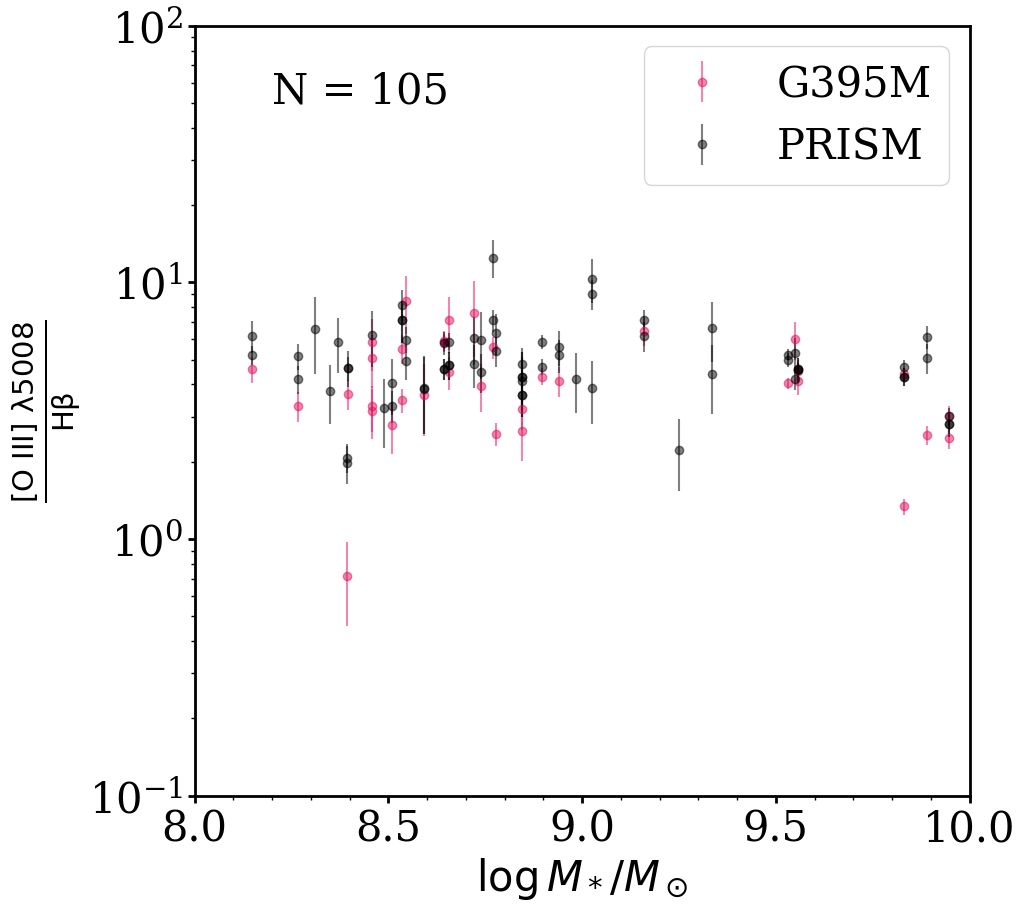

In [172]:
OIIIHbdf = rubies_mergeddf[(rubies_mergeddf.line_oiii_5007/rubies_mergeddf.line_oiii_5007_err > 3)&(rubies_mergeddf.line_hb/rubies_mergeddf.line_hb_err > 3)]
plt.figure(figsize=(10,10))
for grating, grating_color in zip(rubies_mergeddf.grating.unique(), GRATING_COLORS):
    plt.errorbar(x=OIIIHbdf.mstar_50[OIIIHbdf.grating == grating], y=OIIIHbdf.OIII_Hb[OIIIHbdf.grating == grating], 
                yerr=OIIIHbdf.OIII_Hb_ERR[OIIIHbdf.grating == grating], marker='o', ls='None', zorder=-1, c=grating_color, alpha=0.5, label=grating)
plt.annotate(f'N = {len(OIIIHbdf)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel(r'$\log M_*/M_\odot$')
plt.ylabel(r'$\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
plt.yscale('log')
plt.legend()
plt.axis([8, 10, 0.1, 100])
plt.savefig(FIGURES.joinpath('OIIIHb_mstar.pdf'))
plt.show()

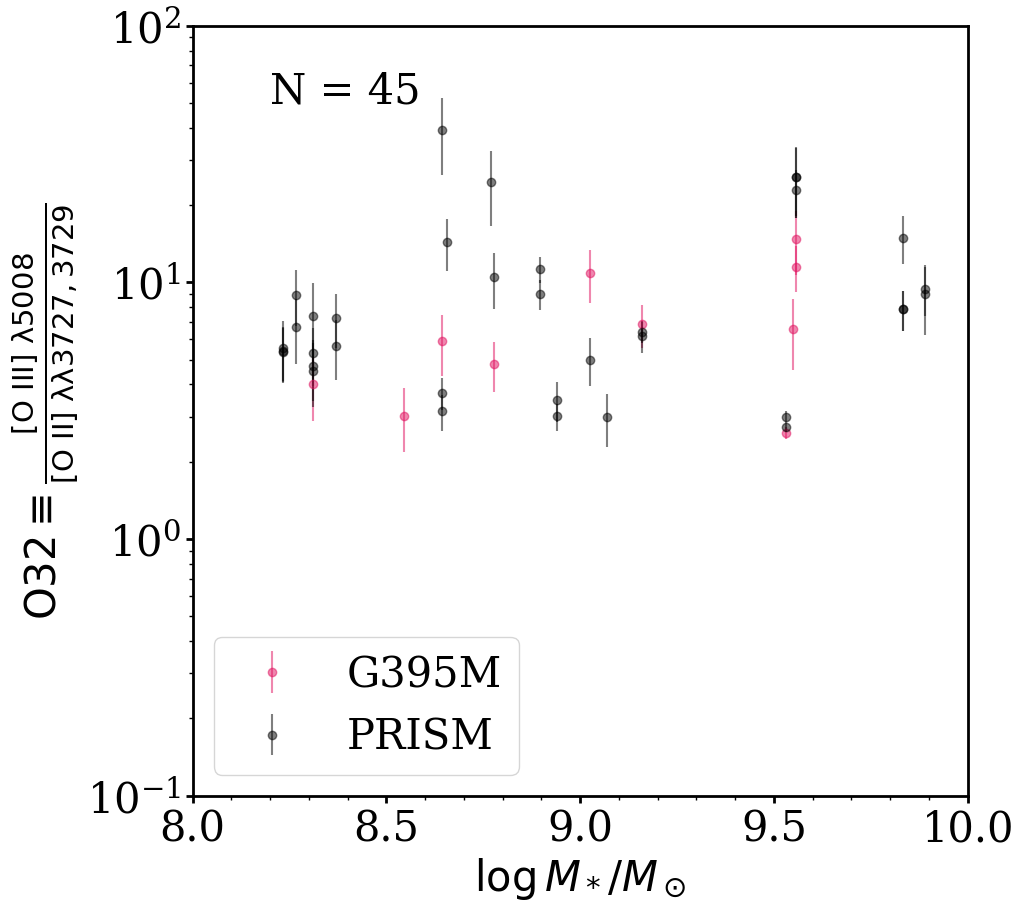

In [173]:
O32df = rubies_mergeddf[(rubies_mergeddf.line_oiii_5007/rubies_mergeddf.line_oiii_5007_err > 3)&(rubies_mergeddf.line_oii/rubies_mergeddf.line_oii_err > 3)]
plt.figure(figsize=(10,10))
for grating, grating_color in zip(rubies_mergeddf.grating.unique(), GRATING_COLORS):
    plt.errorbar(x=O32df.mstar_50[O32df.grating == grating], y=O32df.O32[O32df.grating == grating], 
                yerr=O32df.O32_ERR[O32df.grating == grating], marker='o', ls='None', zorder=-1, c=grating_color, alpha=0.5, label=grating)
plt.annotate(f'N = {len(O32df)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel(r'$\log M_*/M_\odot$')
plt.ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3729}$')
plt.yscale('log')
plt.axis([8, 10, 0.1, 100])
plt.legend()
plt.savefig(FIGURES.joinpath('O32_mstar.pdf'))
plt.show()

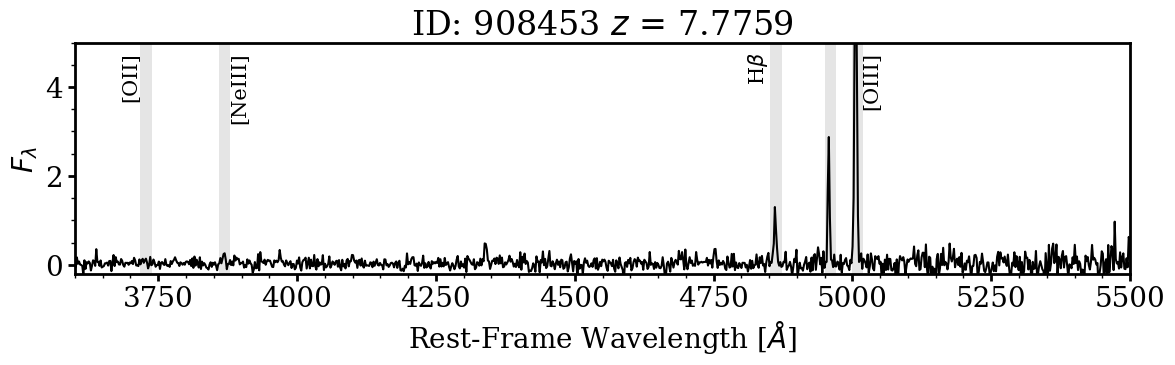

In [3]:
TARGET_LINES = ['OII_3727', 'NeIII_3869', 'Hbeta', 'OIII_4959', 'OIII_5007']
spec_g395m = fits.open(f'{RUBIES_DATA}/rubies-egs51-v3_g395m-f290lp_4233_908453.spec.fits')
spec_prism = fits.open(f'{RUBIES_DATA}/rubies-egs51-v3_prism-clear_4233_908453.spec.fits')
z = 7.7759
id = 908453
wavelength_g395m = 10**4*spec_g395m[1].data['WAVE']/(1+z)
flux_g395m = spec_g395m[1].data['FLUX']
wavelength_prism = 10**4*spec_prism[1].data['WAVE']/(1+z)
flux_prism = spec_prism[1].data['FLUX']

fig = plt.figure(figsize=(15, 3))
gs = GridSpec(nrows=10, ncols=11)
ax = fig.add_subplot(gs[0:10, 0:10])
ax.plot(wavelength_g395m, flux_g395m, color='k')
# ax.plot(wavelength_prism, flux_prism, color='k')

display_lines.display_lines_air(ax, vertical_anchor=4.8, lines_to_show=TARGET_LINES, show_text=True)
plt.title(f'ID: {id} $z$ = {z}')
plt.xlabel(r'Rest-Frame Wavelength [$\AA$]')
plt.ylabel(r'$F_\lambda$')
plt.axis([3600, 5500, -0.2, 5])
plt.savefig(FIGURES.joinpath('spec.pdf'))
plt.show()

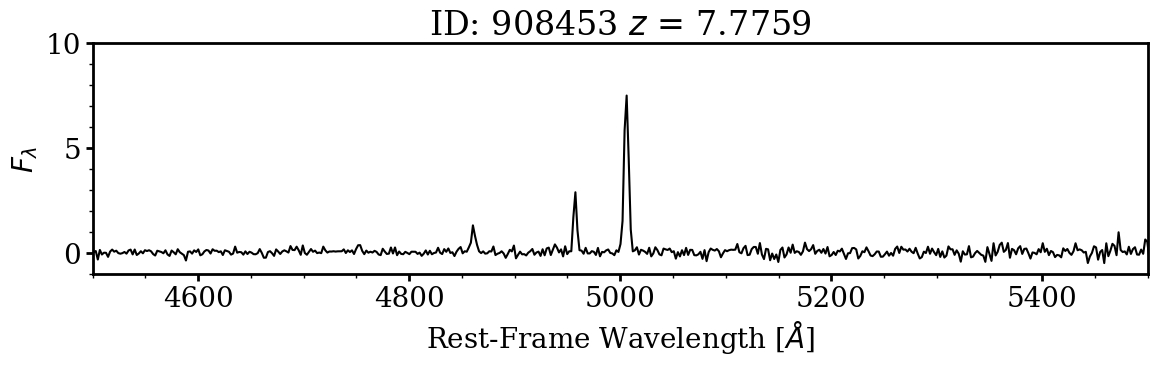

In [11]:
TARGET_LINES = ['OII_3727', 'NeIII_3869', 'Hbeta', 'OIII_4959', 'OIII_5007']
spec_g395m = fits.open(f'{RUBIES_DATA}/rubies-egs51-v3_g395m-f290lp_4233_908453.spec.fits')
spec_prism = fits.open(f'{RUBIES_DATA}/rubies-egs51-v3_prism-clear_4233_908453.spec.fits')
z = 7.7759
id = 908453
wavelength_g395m = 10**4*spec_g395m[1].data['WAVE']/(1+z)
flux_g395m = spec_g395m[1].data['FLUX']
wavelength_prism = 10**4*spec_prism[1].data['WAVE']/(1+z)
flux_prism = spec_prism[1].data['FLUX']

fig = plt.figure(figsize=(15, 3))
gs = GridSpec(nrows=10, ncols=11)
ax = fig.add_subplot(gs[0:10, 0:10])
ax.plot(wavelength_g395m, flux_g395m, color='k')
# ax.plot(wavelength_prism, flux_prism, color='k')

# display_lines.display_lines_air(ax, vertical_anchor=4.8, lines_to_show=TARGET_LINES, show_text=True)
plt.title(f'ID: {id} $z$ = {z}')
plt.xlabel(r'Rest-Frame Wavelength [$\AA$]')
plt.ylabel(r'$F_\lambda$')
plt.axis([4500, 5500, -1, 10])
plt.show()